# Analysis of last.fm reports

Now we'll analyze the stats for my user, `fergomes`.

The first thing you need to do to perform this study is collect all the tracks for your user (or whatever user you want to analyze). This can be done running the python script `lastfm_get_user_historical_tracks.py` on this repo (go to the repo main page and go through the README).

For those who are not familiar, Last.fm is a service that collects and stores what you listen to on many devices. I use the service since 2006, and I had several connectors in the past, including Winamp!

On last.fm dialect, a `scrobble` is a unique track that was listened to on a period of time, and transferred to the platform.

To know more about the platform, check https://www.last.fm/.
If you feel interested on using the service but doesn't know how to scrobble your tracks, check here: https://www.last.fm/about/trackmymusic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import datetime

In [2]:
user = 'fergomes'

if user == 'fergomes':
    directory = 'export_fergomes_20191021'
    file = 'historical_tracks_fergomes_201910211826.csv'

scrobbles_df = pd.read_csv(directory + '/' + file, sep=',')
scrobbles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73747 entries, 0 to 73746
Data columns (total 7 columns):
Unnamed: 0    73747 non-null int64
Timestamp     73747 non-null int64
Artist        73747 non-null object
Track         73747 non-null object
Album         71391 non-null object
Loved         73747 non-null int64
Tags          73747 non-null object
dtypes: int64(3), object(4)
memory usage: 3.9+ MB


In [3]:
import datetime
from pytz import timezone

br = timezone('America/Sao_Paulo')
sp = timezone('Europe/Madrid')

date_moved = int(datetime.datetime(2017,2,6,0,0).timestamp())

list_date_formatted = []

for i in range(len(scrobbles_df)):
    date_epoch = int(scrobbles_df.iloc[i]['Timestamp'])
    if user == 'fergomes' and int(date_epoch) > date_moved:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=sp)
    else:
        date_f = datetime.datetime.fromtimestamp(int(date_epoch), tz=br)
    list_date_formatted.append(date_f)

scrobbles_df['Date formatted'] = list_date_formatted
scrobbles_df['Weekday'] = [datetime.date(idx.year, idx.month, idx.day).strftime('%A') for idx in scrobbles_df['Date formatted']]
scrobbles_df['Weekday_number'] = [datetime.date(idx.year, idx.month, idx.day).isoweekday() for idx in scrobbles_df['Date formatted']]
scrobbles_df['Hour'] = [idx.hour for idx in scrobbles_df['Date formatted']]
scrobbles_df['Month'] = [idx.month for idx in scrobbles_df['Date formatted']]
scrobbles_df['Year'] = [idx.year for idx in scrobbles_df['Date formatted']]

## Top 10 everything!

First, let's build simple charts with top 10 artists, albums, tracks and tags for the whole period.

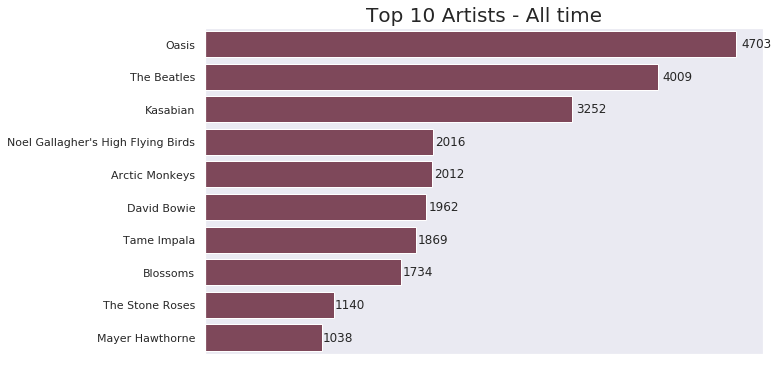

In [4]:
top_artists = Counter(scrobbles_df['Artist'])
top_100_artists = top_artists.most_common(100)

x_artists = [item[0] for item in top_100_artists]
y_artists = [item[1] for item in top_100_artists]

sns.set()
plt.subplots(figsize=(10, 6))

artists_plot = sns.barplot(y_artists[:10], x_artists[:10], color="#873f57")
artists_plot.axes.get_xaxis().set_visible(False)
artists_plot.set_title('Top 10 Artists - All time', fontsize=20)
for p in artists_plot.patches:
    artists_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

    top_albums = Counter(scrobbles_df['Album'])

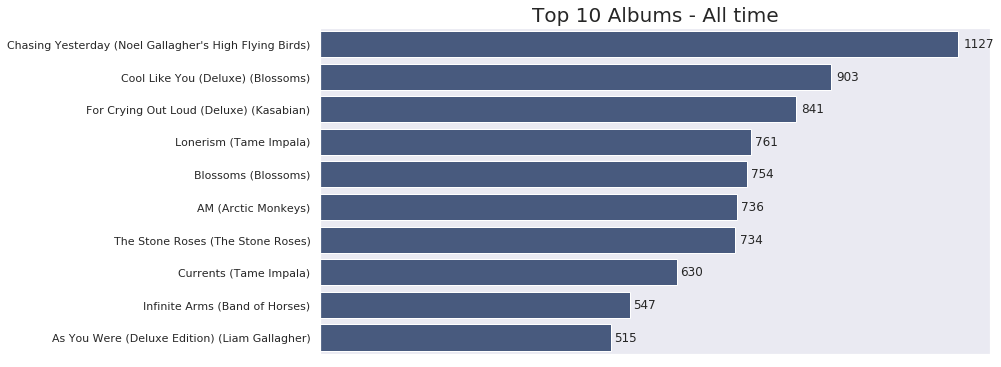

In [5]:
top_albums = Counter(scrobbles_df['Album'])
top_100_albums = top_albums.most_common(100)

x_albums = [item[0] for item in top_100_albums]
y_albums = [item[1] for item in top_100_albums]

x_albums_with_artist = []
for i in range(len(x_albums)):
    try:
        album = x_albums[i]
        artist = scrobbles_df[scrobbles_df.Album == album]['Artist'].mode()[0]
        album_artist = album + " (" + artist + ")"
        x_albums_with_artist.append(album_artist)
    except: x_albums_with_artist.append("nan")

plt.subplots(figsize=(12, 6))
albums_plot = sns.barplot(y_albums[1:11], x_albums_with_artist[1:11], color="#3f5787")
albums_plot.axes.get_xaxis().set_visible(False)
albums_plot.set_title('Top 10 Albums - All time', fontsize=20)
for p in albums_plot.patches:
    albums_plot.text(p.get_width() * 1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

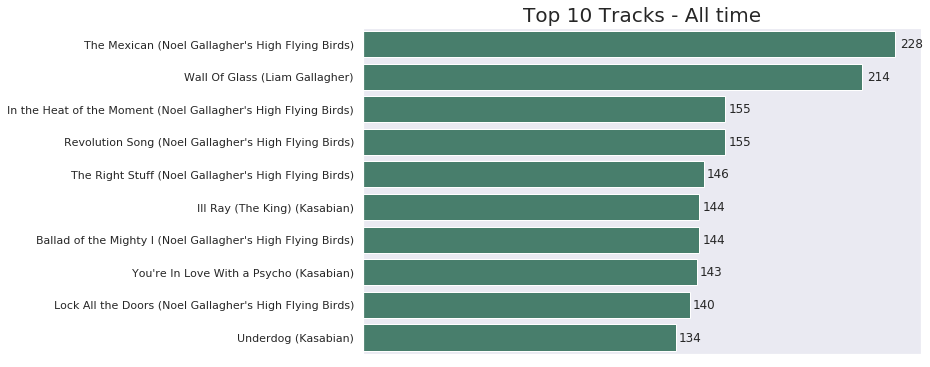

In [6]:
top_tracks = Counter(scrobbles_df['Track'])
top_100_tracks = top_tracks.most_common(100)

x_tracks = [item[0] for item in top_100_tracks]
y_tracks = [item[1] for item in top_100_tracks]


x_tracks_with_artist = []
for i in range(len(x_albums)):
    try:
        track = x_tracks[i]
        artist = scrobbles_df[scrobbles_df.Track == track]['Artist'].mode()[0]
        track_artist = track + " (" + artist + ")"
        x_tracks_with_artist.append(track_artist)
    except: x_tracks_with_artist.append("nan")
        
        
plt.subplots(figsize=(10, 6))
tracks_plot = sns.barplot(y_tracks[:10], x_tracks_with_artist[:10], color="#3f876f")
tracks_plot.axes.get_xaxis().set_visible(False)
tracks_plot.set_title('Top 10 Tracks - All time', fontsize=20)
for p in tracks_plot.patches:
    tracks_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

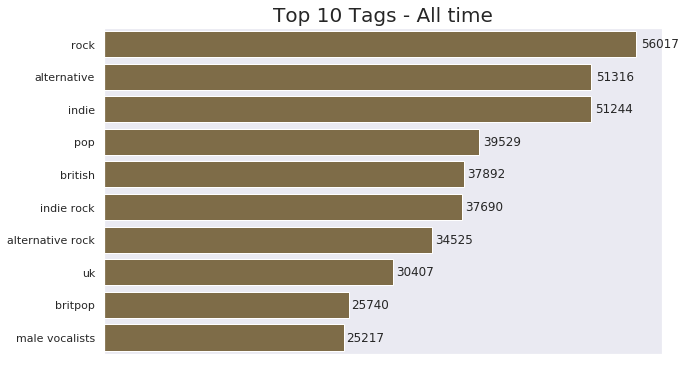

In [7]:
tags_df = scrobbles_df['Tags']
count_tags = {}

for i in range(len(scrobbles_df)):
    str1 = tags_df.iloc[i]
    str1 = str1.replace("[","").replace("]","").replace("'","")
    str1 = str1.split(", ")
    for j in range(len(str1)):
        if str1[j] not in count_tags:
            count_tags[str1[j]] = 1
        elif str1[j] in count_tags:
            count_tags[str1[j]] += 1
            
top_tags = Counter(count_tags)
top_100_tags = top_tags.most_common(100)

x_tags = [item[0] for item in top_100_tags]
y_tags = [item[1] for item in top_100_tags]

plt.subplots(figsize=(10, 6))
tags_plot = sns.barplot(y_tags[:10], x_tags[:10], color="#876f3f")
tags_plot.axes.get_xaxis().set_visible(False)
tags_plot.set_title('Top 10 Tags - All time', fontsize=20)
for p in tags_plot.patches:
    tags_plot.text(p.get_width()*1.01, p.get_y() + p.get_height()/2.,'%d' % int(p.get_width()), 
            fontsize=12, ha='left', va='center')

## How obsessed am I?

Let's check the distribution of artists, albums and tracks, to see if I listen too much of one thing in regard os others.

We'll consider just the top 100 of each item, to keep the charts clean.

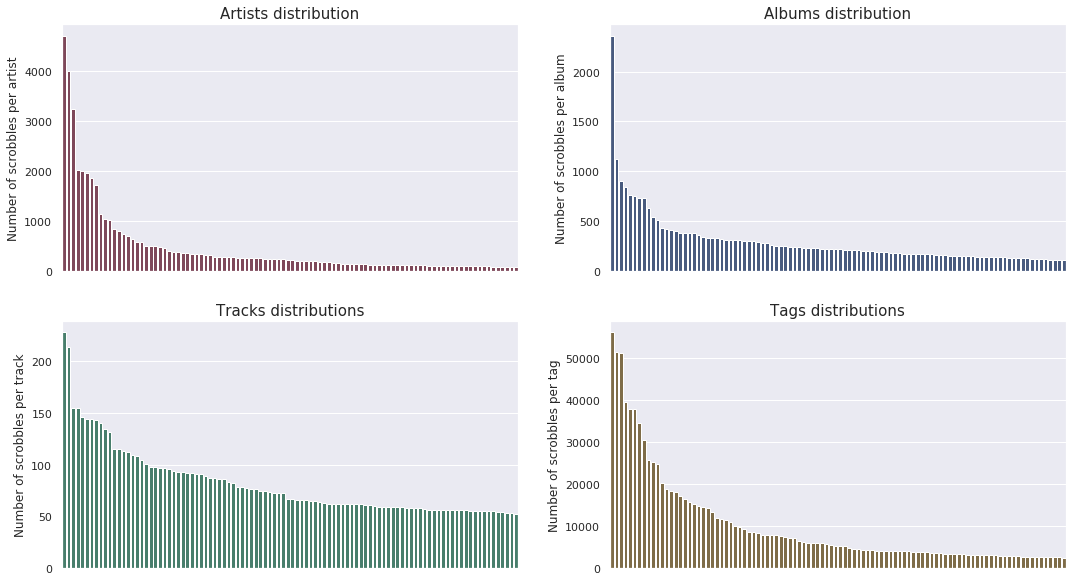

In [8]:
plt.subplots(figsize=(18, 10))

plt.subplot(2, 2, 1)
artists_dist = sns.barplot(x_artists, y_artists, color="#873f57")
artists_dist.set_ylabel("Number of scrobbles per artist")
artists_dist.axes.get_xaxis().set_visible(False)
artists_dist.set_title('Artists distribution', fontsize=15)

plt.subplot(2, 2, 2)
albums_dist = sns.barplot(x_albums_with_artist, y_albums, color="#3f5787")
albums_dist.set_ylabel("Number of scrobbles per album")
albums_dist.axes.get_xaxis().set_visible(False)
albums_dist.set_title('Albums distribution', fontsize=15)

plt.subplot(2, 2, 3)
tracks_dist = sns.barplot(x_tracks_with_artist, y_tracks, color="#3f876f")
tracks_dist.set_ylabel("Number of scrobbles per track")
tracks_dist.axes.get_xaxis().set_visible(False)
tracks_dist.set_title('Tracks distributions', fontsize=15)

plt.subplot(2, 2, 4)
tags_dist = sns.barplot(x_tags, y_tags, color="#876f3f")
tags_dist.set_ylabel("Number of scrobbles per tag")
tags_dist.axes.get_xaxis().set_visible(False)
tags_dist.set_title('Tags distributions', fontsize=15)

plt.show()

So, I have a high concentration of artists and tags (the curves are more dramatic), however the distribution on albums and tracks are smoother. The albums and tracks are more evenly distributed however they are albums from the same artists. (To be studied)

_Soundtrack for this first part of the study: [The Kinks](https://open.spotify.com/user/ohhrosie/playlist/4bW4B1ZAJL2QeVxjmz3K4K?si=gzblx6t9R8OMJL2wgttdjw)_

![Kinks](https://i.imgur.com/KcJd5eQb.png)





## How I listen to music over time

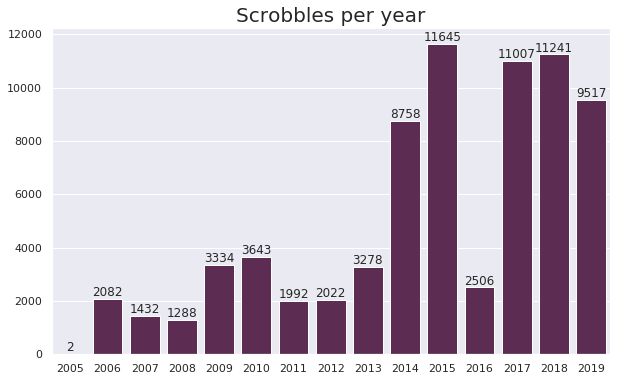

In [9]:
years = sorted(list(scrobbles_df['Year'].unique()))
tracks_per_year = [len(scrobbles_df[scrobbles_df['Year'] == i]) for i in years]

sns.set()
plt.subplots(figsize=(10, 6))
yearly_tracks = sns.barplot(years, tracks_per_year, color="#642457")
yearly_tracks.set_title('Scrobbles per year', fontsize=20)
for p in yearly_tracks.patches:
    yearly_tracks.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

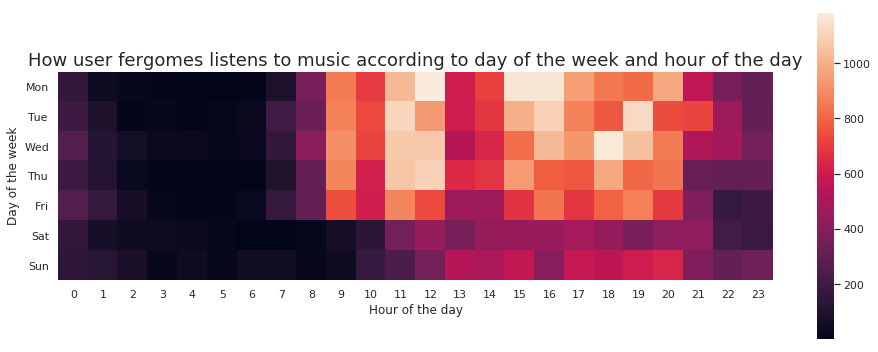

In [10]:
matrix_hour_weekday = scrobbles_df.pivot_table(index='Weekday_number', 
               columns='Hour',
               aggfunc='size',
               fill_value=0)

f, ax = plt.subplots(figsize=(16, 6))
heatmat_hour_weekday = sns.heatmap(matrix_hour_weekday, square=True,
                                   yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
title = 'How user ' + str(user) + ' listens to music according to day of the week and hour of the day'
heatmat_hour_weekday.set_title(title, fontsize=18)
plt.yticks(rotation=0)
plt.xlabel("Hour of the day")
plt.ylabel("Day of the week")
plt.show()

_Soundtrack for this first part of the study: [The Blossoms](https://open.spotify.com/album/0yO5Mwu2oDdGbeRFpAaBGa?si=yxsQbO8eStmMsBK7eDVvMA)_

![Blossoms](https://i.imgur.com/KHt35a8b.jpg)

### Last week and Last month comparisons

In [11]:
import datetime

today = scrobbles_df.iloc[0]['Date formatted']

week = datetime.timedelta(days=7)
last_week = today - week
two_weeks_ago = last_week - week

In [12]:
last_week_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] > last_week]

two_weeks_ago_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] < last_week]
two_weeks_ago_scrobbles = two_weeks_ago_scrobbles[two_weeks_ago_scrobbles['Date formatted'] > two_weeks_ago]

weekly_scrobbles = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_scrobbles),
                    last_week.strftime('%m/%d'): len(last_week_scrobbles)}

In [13]:
last_week_artists = pd.unique(last_week_scrobbles['Artist'])
two_weeks_ago_artists = pd.unique(two_weeks_ago_scrobbles['Artist'])

weekly_artists = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_artists),
                  last_week.strftime('%m/%d'): len(last_week_artists)}

In [14]:
last_week_albums = pd.unique(last_week_scrobbles['Album'])
two_weeks_ago_albums = pd.unique(two_weeks_ago_scrobbles['Album'])

weekly_albums = {two_weeks_ago.strftime('%m/%d'): len(two_weeks_ago_albums),
                 last_week.strftime('%m/%d'): len(last_week_albums)}

Text(0.5, 1.0, '# of albums - WoW')

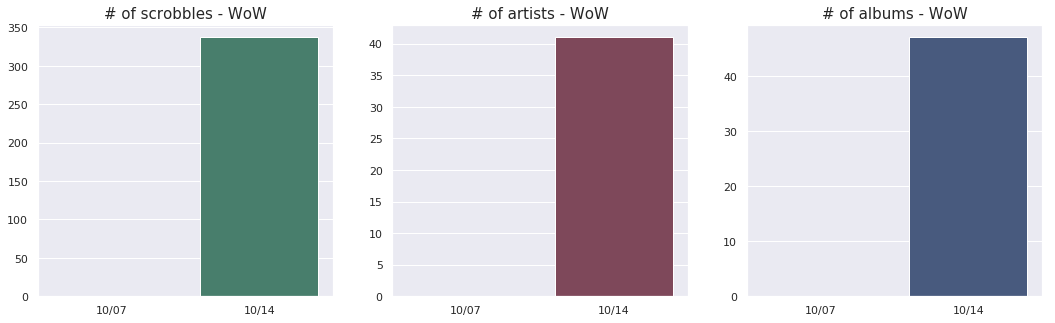

In [15]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = weekly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f876f")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - WoW', fontsize=15)

plt.subplot(1, 3, 2)
lists = weekly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#873f57")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - WoW', fontsize=15)

plt.subplot(1, 3, 3)
lists = weekly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f5787")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - WoW', fontsize=15)

In [16]:
month = datetime.timedelta(days=30)
last_month = today - month
two_months_ago = last_month - month

In [17]:
last_month_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] > last_month]

two_months_ago_scrobbles = scrobbles_df[scrobbles_df['Date formatted'] < last_month]
two_months_ago_scrobbles = two_months_ago_scrobbles[two_months_ago_scrobbles['Date formatted'] > two_months_ago]

monthly_scrobbles = {two_months_ago.strftime('%m/%d'): len(two_months_ago_scrobbles),
                     last_month.strftime('%m/%d'): len(last_month_scrobbles)}

In [18]:
last_month_artists = pd.unique(last_month_scrobbles['Artist'])
two_months_ago_artists = pd.unique(two_months_ago_scrobbles['Artist'])

monthly_artists = {two_months_ago.strftime('%m/%d'): len(two_months_ago_artists),
                   last_month.strftime('%m/%d'): len(last_month_artists)}

In [19]:
last_month_albums = pd.unique(last_month_scrobbles['Album'])
two_months_ago_albums = pd.unique(two_months_ago_scrobbles['Album'])

monthly_albums = {two_months_ago.strftime('%m/%d'): len(two_months_ago_albums),
                  last_month.strftime('%m/%d'): len(last_month_albums)}

Text(0.5, 1.0, '# of albums - MoM')

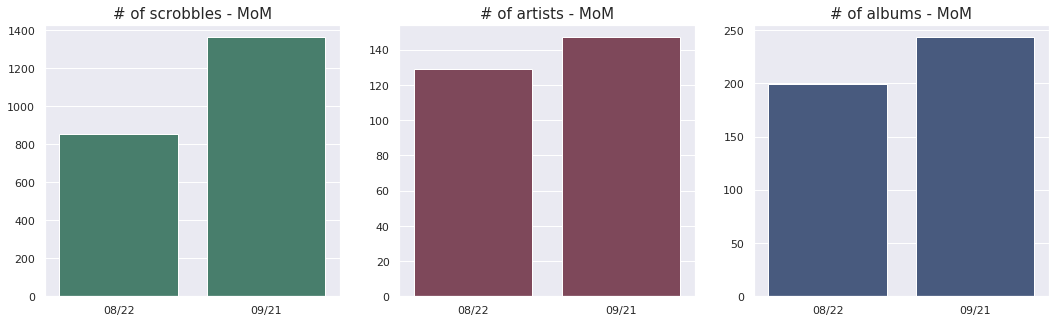

In [20]:
plt.subplots(figsize=(18, 5))

plt.subplot(1, 3, 1)
lists = monthly_scrobbles.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f876f")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of scrobbles - MoM', fontsize=15)

plt.subplot(1, 3, 2)
lists = monthly_artists.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#873f57")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of artists - MoM', fontsize=15)

plt.subplot(1, 3, 3)
lists = monthly_albums.items()
x, y = zip(*lists)

artists_dist = sns.barplot(list(x), list(y), color="#3f5787")
artists_dist.axes.get_xaxis().set_visible(True)
artists_dist.set_title('# of albums - MoM', fontsize=15)

### Obsessions over time

Let's first build a dataframe of scrobbles per year

In [21]:
scrobbles_per_year = {}

for i in years:
    scrobbles_per_year['tracks_' + str(i)] = scrobbles_df.loc[scrobbles_df['Year'] == i]

In [22]:
dict_top_tracks = {}
for key, value in scrobbles_per_year.items():
    count = 0
    old_track = ''
    dict_tracks_per_year = {}
    for i in range(len(value['Track'])):
        new_track = value.iloc[i]['Track']
        if old_track == new_track:
            count += 1
            if count > 2: dict_tracks_per_year[(value.iloc[i]['Artist'], value.iloc[i]['Track'])] = count
        else:
            count = 0
        old_track = new_track
    sorted_dict = sorted(dict_tracks_per_year.items(), key=lambda x: x[1], reverse=True)
    dict_top_tracks[key[-4:]] = sorted_dict[:5]

In [23]:
for key, value in dict_top_tracks.items():
    if len(value) > 0:
        print('In', key, 'the most listened tracks on repeat were:')
        for item in value:
            print('"' + item[0][1] + '" by', item[0][0], item[1], 'times')
        print('')

In 2007 the most listened tracks on repeat were:
"The Mating Game" by Bitter:Sweet 3 times

In 2009 the most listened tracks on repeat were:
"Vlad the Impaler" by Kasabian 13 times
"Club Foot" by Kasabian 10 times
"Ladies & Gentlemen (Roll The Dice)" by Kasabian 8 times
"Breakout" by Foo Fighters 8 times
"L.S.F. (Lost Souls Forever)" by Kasabian 7 times

In 2010 the most listened tracks on repeat were:
"Sinking Friendships" by Jónsi 8 times
"Boy Lilikoi" by Jónsi 8 times
"Animal Arithmetic" by Jónsi 8 times
"Go Do" by Jónsi 8 times
"Kolnidur" by Jónsi 6 times

In 2011 the most listened tracks on repeat were:
"The Roller" by Beady Eye 12 times
"Millionaire" by Beady Eye 12 times
"Beatles and Stones" by Beady Eye 12 times
"Bring the Light" by Beady Eye 11 times
"For Anyone" by Beady Eye 11 times

In 2012 the most listened tracks on repeat were:
"Teddy Picker" by Arctic Monkeys 8 times
"Who Put the Weight of the World on My Shoulders?" by Oasis 3 times
"Place" by Lucy Rose 3 times
"One Wa

_Soundtrack for this first part of the study: [Modest Mouse](https://open.spotify.com/album/5SbcupirEParczvqqyUPXL?si=DLNp2lX6Q82fDntFRM_fsQ)_

![The Postal Service](https://imgur.com/ImSOx5pt.png)

### Let's analyze a little bit the tags

We will build a vector of tags. First we build a list with the unique tags. Then, for each scrobble, it will analyze if the tag is present. If it is, it will flag with 1 (on the position that tag is on the unique tags list) and, if not, with a 0.

In [24]:
list_short = ["uk", "mpb", "pop", "20s", "30s","40s", "50s", "60s", "70s", "80s", "90s", "00s", "10s", 
              "emo", "mod", "rap", "rnb", "usa", "dub", "ska", "r&b", "idm", "edm",]
all_tags = []

for i in range(len(scrobbles_df)):
    tagg = scrobbles_df['Tags'][i].replace("[","").replace("]","").replace("'","")
    tag_list = tagg.split(", ")
    for j in tag_list:
        if len(j) > 3 or j in list_short:
            if j not in all_tags:
                all_tags.append(j)

In [25]:
def make_list_from_string(string):
    return string.replace("[","").replace("]","").replace("'","").split(", ")
    
def make_user_interest_vector(user_interests):
    """ given a list of interests, produce a vector whose ith element iss 1
    if unique_interests[i] is in the list, 0 otherwise """
    return [1 if interest in user_interests else 0
            for interest in all_tags]


In [26]:
supreme_list_tags_vector = []

for i in range(len(scrobbles_df)):
    list_tags = make_list_from_string(scrobbles_df['Tags'][i])
    tag_vector = make_user_interest_vector(list_tags)
    supreme_list_tags_vector.append(tag_vector)  


In [27]:
scrobbles_df['TagsVector'] = supreme_list_tags_vector

_Soundtrack for this first part of the study: [Band of Horses](https://open.spotify.com/album/08fkw9uDP2KET6cPIl74Xo?si=YedcmWXjSuKg4ddN5saUfQ)_

![Band of Horses](https://i.imgur.com/r9aLICc.jpg?1)

Now we'll use K Means (using sklearn) to cluster similar artists according to the tags they have. We will define 10 clusters and see how they are grouped.

In [28]:
from sklearn.cluster import KMeans

num_clusters = 10

km = KMeans(n_clusters=num_clusters)

%time km.fit(supreme_list_tags_vector)

clusters = km.labels_.tolist()

CPU times: user 9min 50s, sys: 2min 48s, total: 12min 38s
Wall time: 13min 32s


Here we create a dictionary of artist and its cluster assignment.

In [29]:
artists = { 'artist': list(scrobbles_df['Artist']), 'cluster': clusters}

In [30]:
frame = pd.DataFrame(artists, index = [clusters] , columns = ['artist', 'cluster'])

In [31]:
frame['cluster'].value_counts() # number of scrobbles per cluster (clusters from 0 to 4)

5    18643
3     9298
1     8776
2     8288
8     7970
6     6427
0     5353
7     3410
4     3168
9     2414
Name: cluster, dtype: int64

Here is some indexing and sorting on each cluster to identify which are the top n (I chose n=6) words that are nearest to the cluster centroid. This gives a good sense of the main topic of the cluster.

In [32]:
print("Top tags per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
dict_cluster_tags = {}
dict_cluster_artists = {}

for i in range(num_clusters):
    list_titles = []
    print("\nCluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]:
        print(' %s' % all_tags[ind], end=',')
        try: dict_cluster_tags[i].append(all_tags[ind])
        except: dict_cluster_tags[i] = [all_tags[ind]]
    print('\n\n')
    
    print("Cluster %d artists: " % i, end='')
    for title in frame.loc[i]['artist'].values.tolist():
        if title not in list_titles and len(list_titles) <= 50:
            list_titles.append(title)
            try: dict_cluster_artists[i].append(title)
            except: dict_cluster_artists[i] = [title]
    for i in range(0,len(list_titles)):
        print(list_titles[i], end=', ') 
    print("\n\n=======================================================================================") 
    
print('\n\n')

Top tags per cluster:


Cluster 0 words: indie, rock, indie rock, alternative, psychedelic, experimental,


Cluster 0 artists: Deerhunter, Allah-Las, Best Coast, Portugal. The Man, Crocodiles, Fuzz, of Montreal, Slowdive, Tame Impala, Neon Indian, MGMT, Porcupine Tree, The Telescopes, M83, Boogarins, Wild Nothing, Warpaint, Wavves, Night Beats, Sigur Rós, John Maus, Spiritualized, The Lemon Twigs, The Brian Jonestown Massacre, Froth, Dungen, Mercury Rev, Morgan Delt, Jupiter Apple, Les Big Byrd, Pram, Wooden Shjips, Moon Duo, The Black Angels, Dead Vibrations, TV on the Radio, Real Estate, Pond, Beach Fossils, The xx, A Place to Bury Strangers, Youth Lagoon, Gliss, The Apples in Stereo, Carne Doce, Sinoia Caves, Mogwai, God Is An Astronaut, Explosions in the Sky, Jónsi & Alex, Glowworm, 


Cluster 1 words: rock, indie, alternative, alternative rock, indie rock, punk,


Cluster 1 artists: The Kills, The Libertines, Miles Kane, Slightly Stoopid, Arctic Monkeys, She Wants Revenge, Reignin

_Soundtrack for this first part of the study: [The Postal Service](https://open.spotify.com/album/4ssF0ppdJnMTtL2hg1CLKX?si=dUOpusnlRCOEoyNZ4oAhnA)_

![The Postal Service](https://imgur.com/f5hmnPat.png)

In [33]:
import json
import pylast

def get_credentials():
    with open("secrets.json", 'r') as file:
        jsonfile = json.load(file)
        API_KEY = jsonfile["API"]["API_KEY"]
        API_SECRET = jsonfile["API"]["API_SECRET"]
        username = jsonfile["API"]["username"]
        password = jsonfile["API"]["password_hash"]
        password_hash = pylast.md5(password)
    return API_KEY, API_SECRET, username, password, password_hash

API_KEY, API_SECRET, username, password, password_hash = get_credentials()
network = pylast.LastFMNetwork(api_key=API_KEY, api_secret=API_SECRET, username=username, password_hash=password_hash)

In [34]:
import requests
from collections import defaultdict, Counter

for i in range(len(dict_cluster_tags)):
    tags_list = dict_cluster_tags[i]
    dict_artists_tags = defaultdict(list)
    megalist = []
    for tag in tags_list:
        url = 'http://ws.audioscrobbler.com/2.0/?method=tag.gettopartists&tag=' + tag + '&api_key=' + API_KEY + '&format=json&limit=30'
        r = requests.get(url)
        r_json = json.loads(r.content)
        for a, artist in enumerate(r_json['topartists']['artist']):
            if artist not in dict_cluster_artists[i]:
                megalist.append(artist['name'])
                dict_artists_tags[tag].append(artist['name'])
    c = Counter(megalist).most_common(10)
    print(dict_cluster_tags[i], '\n', c, '\n\n')

['indie', 'rock', 'indie rock', 'alternative', 'psychedelic', 'experimental'] 
 [('Arcade Fire', 2), ('The Killers', 1), ('Florence + the Machine', 1), ('The Smiths', 1), ('The xx', 1), ('Death Cab for Cutie', 1), ('Sufjan Stevens', 1), ('Interpol', 1), ('Modest Mouse', 1), ('Imagine Dragons', 1)] 


['rock', 'indie', 'alternative', 'alternative rock', 'indie rock', 'punk'] 
 [('Incubus', 2), ('Arcade Fire', 2), ('Angels & Airwaves', 2), ('Blue October', 2), ('Coldplay', 1), ('Linkin Park', 1), ('Red Hot Chili Peppers', 1), ('David Bowie', 1), ('Paramore', 1), ('Foo Fighters', 1)] 


['rock', 'classic rock', 'british', '60s', 'oldies', '70s'] 
 [('Coldplay', 1), ('Linkin Park', 1), ('Red Hot Chili Peppers', 1), ('David Bowie', 1), ('Paramore', 1), ('Foo Fighters', 1), ('Kings of Leon', 1), ('U2', 1), ('Maroon 5', 1), ('Panic! at the Disco', 1)] 


['rock', 'alternative', 'british', 'britpop', 'indie', 'alternative rock'] 
 [('Incubus', 2), ('Angels & Airwaves', 2), ('Blue October', 2),

### Simple recomendation

Now that we have our clustered artists, we can try to start recommending new ones (based on the clusters). Let's start using the method "Get Similar Artists" from Last.fm itself.

For a given cluster, we'll get the first 30 artists similar to each artist and rank by how many times the recommended artist appears. On this process, we make sure that the recommended artist is already not on the cluster

In [ ]:
for i in range(len(dict_cluster_tags)):
    tags_list = dict_cluster_artists[i]
    dict_artists_tags = defaultdict(list)
    megalist = []
    for tag in tags_list:
        tag = tag.replace('&', 'and')
        url = 'http://ws.audioscrobbler.com/2.0/?method=artist.getsimilar&artist=' + tag + '&api_key=' + API_KEY + '&format=json&limit=30'
        r = requests.get(url)
        r_json = json.loads(r.content)
        similar_artists = r_json['similarartists']['artist']
        for a, artist in enumerate(similar_artists):
            if artist['name'] not in dict_cluster_artists[i]:
                megalist.append(artist['name'])
                dict_artists_tags[tag].append(artist['name'])
    c = Counter(megalist).most_common(10)
    print('For cluster with tags: ', end='')
    for item in dict_cluster_tags[i]: print(item, end=', ')
    print('\nSuggestions:')
    for item in c: print('- ', item[0], '(seen', item[1], 'times)')
    print('\n\n')
    

For cluster with tags: indie, rock, indie rock, alternative, psychedelic, experimental, 
Suggestions:
-  Holy Wave (seen 12 times)
-  Thee Oh Sees (seen 11 times)
-  DIIV (seen 10 times)
-  The Holydrug Couple (seen 10 times)
-  Psychic Ills (seen 10 times)
-  Wand (seen 10 times)
-  Mystic Braves (seen 9 times)
-  The Warlocks (seen 9 times)
-  Beach House (seen 8 times)
-  Temples (seen 8 times)



For cluster with tags: rock, indie, alternative, alternative rock, indie rock, punk, 
Suggestions:
-  The Vaccines (seen 13 times)
-  Kasabian (seen 11 times)
-  Dirty Pretty Things (seen 11 times)
-  Royal Blood (seen 10 times)
-  Hard-Fi (seen 10 times)
-  The Wombats (seen 10 times)
-  We Are Scientists (seen 10 times)
-  Black Rebel Motorcycle Club (seen 9 times)
-  The Courteeners (seen 9 times)
-  Razorlight (seen 9 times)



For cluster with tags: rock, classic rock, british, 60s, oldies, 70s, 
Suggestions:
-  The Hollies (seen 20 times)
-  The Move (seen 18 times)
-  The Lovin' Spo

_Soundtrack for this first part of the study: [Liam Gallagher - Why Me? Why Not.](https://open.spotify.com/album/6iInyjotj1rYpx3vbX0MxX?si=k5tz1UJ3RfGeEFPk4F_1dA)_

![Liam Gallagher](https://imgur.com/uOUASLkt.png)